Name: Aditya Desai<br>
Roll: PC15

#Importing necesssary libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing dataset into dataframe

In [0]:
from google.colab import files
from io import BytesIO

uploaded = files.upload()

Saving studentdata.csv to studentdata.csv


In [0]:
dataset = pd.read_csv(BytesIO(uploaded['studentdata.csv']))

#Preprocessing dataset using Imputer function

In [0]:
from sklearn.impute import SimpleImputer

# Filling mising value with most frequent value
imp = SimpleImputer(missing_values='NaN', strategy='most_frequent')
dataset = pd.DataFrame(imp.fit_transform(dataset), columns=dataset.columns)
dataset.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,4,0,4,8,yes,yes,yes,shell programming,cloud computing,no,yes,excellent,excellent,cloud computing,system developer,higherstudies,Web Services,no,no,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,7,1,2,3,yes,no,yes,machine learning,database security,no,no,poor,medium,networks,Business process analyst,job,SAaS services,yes,yes,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,1,4,1,3,yes,no,yes,app development,web technologies,no,yes,poor,excellent,hacking,developer,higherstudies,Sales and Marketing,yes,yes,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,1,1,2,5,no,yes,no,python,data science,yes,no,medium,excellent,networks,testing,higherstudies,Testing and Maintainance Services,no,no,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,5,4,6,3,no,no,no,app development,cloud computing,no,no,poor,excellent,Computer Architecture,testing,higherstudies,product development,no,yes,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst











# Feature Selection
Removing useless dimensions

In [0]:
drop_data = [
    'can work long time before system?', 
    'Extra-courses did', 
    'talenttests taken?', 
    'olympiads',
    'Salary/work',
    'Introvert',
    'In a Realtionship?',
    'Gentle or Tuff behaviour?',
    'Salary Range Expected',
    'interested in games',
    'self-learning capability?'
]
dataset = dataset.drop(drop_data, axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Acedamic percentage in Operating Systems  20000 non-null  object
 1   percentage in Algorithms                  20000 non-null  object
 2   Percentage in Programming Concepts        20000 non-null  object
 3   Percentage in Software Engineering        20000 non-null  object
 4   Percentage in Computer Networks           20000 non-null  object
 5   Percentage in Electronics Subjects        20000 non-null  object
 6   Percentage in Computer Architecture       20000 non-null  object
 7   Percentage in Mathematics                 20000 non-null  object
 8   Percentage in Communication skills        20000 non-null  object
 9   Hours working per day                     20000 non-null  object
 10  Logical quotient rating                   2000

#Some dastaset info

In [0]:
print(f'Dimensions of dataset : {dataset.shape}', end='\n\n')

dataset.describe()

Dimensions of dataset : (20000, 28)



,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,certifications,workshops,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,Interested Type of Books,Management or Technical,hard/smart worker,worked in teams ever?,Suggested Job Role
count,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000
unique,35,35,35,35,35,35,35,35,35,9,9,7,9,9,9,8,3,3,10,6,2,10,2,31,2,2,2,34
top,86,61,77,84,64,61,86,68,67,5,5,2,2,7,r programming,web technologies,excellent,poor,networks,testing,higherstudies,BPA,yes,Guide,Technical,smart worker,no,Network Security Administrator
freq,638,627,616,620,639,603,627,635,617,2273,2275,2918,2298,2268,2275,2586,6696,6677,2096,3354,10071,2073,10036,1172,10047,10047,10054,1112


In [0]:
print(dataset.groupby('Suggested Job Role').size(), end='\n\n')

Suggested Job Role
Applications Developer                        551
Business Intelligence Analyst                 540
Business Systems Analyst                      582
CRM Business Analyst                          584
CRM Technical Developer                       567
Data Architect                                564
Database Administrator                        593
Database Developer                            581
Database Manager                              570
Design & UX                                   588
E-Commerce Analyst                            546
Information Security Analyst                  543
Information Technology Auditor                558
Information Technology Manager                591
Mobile Applications Developer                 538
Network Engineer                              621
Network Security Administrator               1112
Network Security Engineer                     630
Portal Administrator                          593
Programmer Analyst             

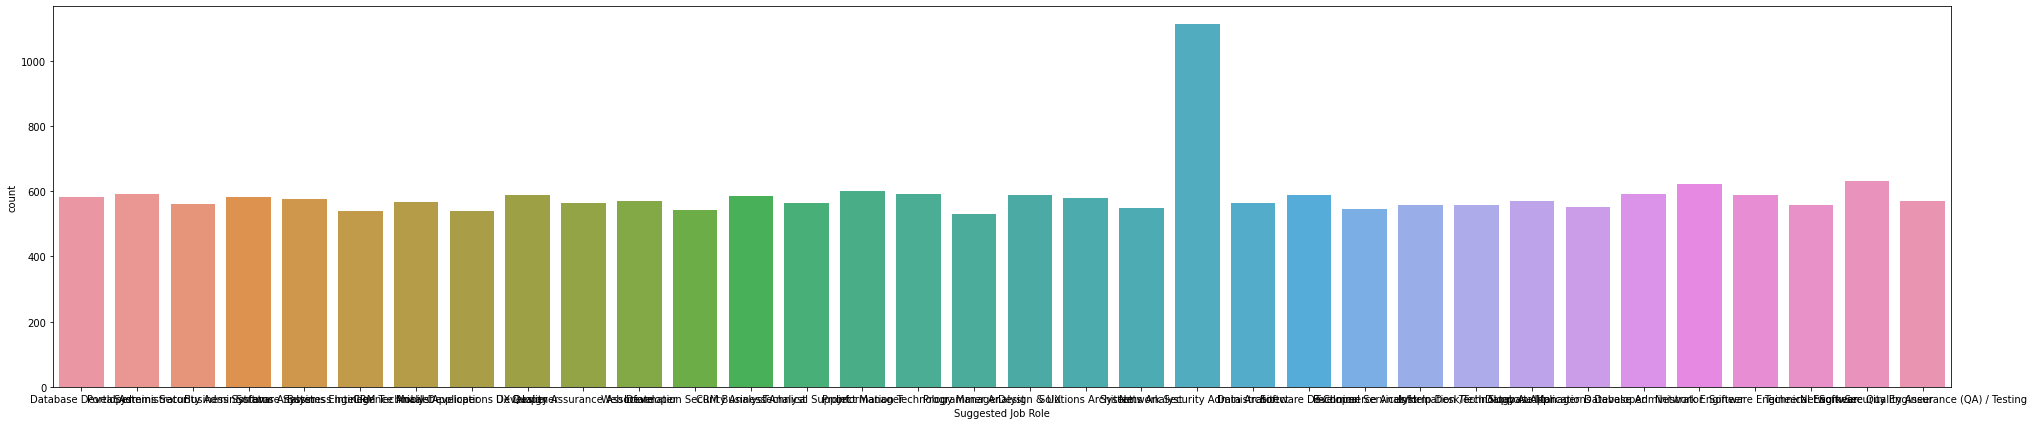

In [0]:
plt.figure(figsize=(len(set(dataset['Suggested Job Role'])), 7))
sns.countplot(dataset['Suggested Job Role'], label='Count')

In [0]:
dataset.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,certifications,workshops,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,Interested Type of Books,Management or Technical,hard/smart worker,worked in teams ever?,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,4,0,4,8,shell programming,cloud computing,excellent,excellent,cloud computing,system developer,higherstudies,Web Services,no,Prayer books,Management,hard worker,yes,Database Developer
1,78,62,73,60,71,70,73,84,91,12,7,1,2,3,machine learning,database security,poor,medium,networks,Business process analyst,job,SAaS services,yes,Childrens,Technical,hard worker,no,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,1,4,1,3,app development,web technologies,poor,excellent,hacking,developer,higherstudies,Sales and Marketing,yes,Travel,Management,hard worker,no,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,1,1,2,5,python,data science,medium,excellent,networks,testing,higherstudies,Testing and Maintainance Services,no,Romance,Management,smart worker,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,5,4,6,3,app development,cloud computing,poor,excellent,Computer Architecture,testing,higherstudies,product development,no,Cookbooks,Management,hard worker,yes,Business Systems Analyst


# Classification techniques

Encoding categorical data using OneHotEncoding strategy

In [0]:
categorical = [
               'certifications',
               'workshops',
               'reading and writing skills', 
               'memory capability score',
               'Interested subjects',
               'interested career area ', 
               'Job/Higher Studies?',
               'Type of company want to settle in?',
               'Taken inputs from seniors or elders', 
               'Interested Type of Books',
               'Management or Technical',
               'hard/smart worker', 
               'worked in teams ever?']

In [0]:
onehot_data = pd.get_dummies(dataset, columns=categorical, drop_first=True)

In [0]:
# Reordering data
cols = onehot_data.columns.to_list()
cols.remove('Suggested Job Role')
cols.append('Suggested Job Role')

onehot_data = onehot_data.reindex(columns=cols)

Selecting the dependent and independent varaibles

In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

X = onehot_data.iloc[:, :-1]

y = dataset.iloc[:,-1].values
y = ohe.fit_transform(y.reshape(-1,1)).toarray()

Splitting data into testing and training data

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=1)

# 1. K Nearest Neighbors (KNN)


In [0]:
from sklearn.neighbors import KNeighborsClassifier

# List of the classifier model for each Target label
knn_classifiers = []
knn_accuracy = []

for i in range(dataset['Suggested Job Role'].nunique()):
  #Training the classifier
  knn = KNeighborsClassifier(n_neighbors=5)
  knn.fit(X_train.values, np.array(y_train[:,i]).ravel())
  
  #Appending the classifier to the list
  knn_classifiers.append(knn)
  print(f"Accuracy of KNN {i+1}:  {knn.score(X_test,y_test[:,i])}", end='\n\n')
  knn_accuracy.append(knn.score(X_test,y_test[:,i]))

Accuracy of KNN 1:  0.9698

Accuracy of KNN 2:  0.9732

Accuracy of KNN 3:  0.9698

Accuracy of KNN 4:  0.9674

Accuracy of KNN 5:  0.9708

Accuracy of KNN 6:  0.9718

Accuracy of KNN 7:  0.9684

Accuracy of KNN 8:  0.9724

Accuracy of KNN 9:  0.9712

Accuracy of KNN 10:  0.9738

Accuracy of KNN 11:  0.9748

Accuracy of KNN 12:  0.9734

Accuracy of KNN 13:  0.9688

Accuracy of KNN 14:  0.972

Accuracy of KNN 15:  0.9722

Accuracy of KNN 16:  0.9682

Accuracy of KNN 17:  0.9464

Accuracy of KNN 18:  0.9644

Accuracy of KNN 19:  0.969

Accuracy of KNN 20:  0.9744

Accuracy of KNN 21:  0.9718

Accuracy of KNN 22:  0.9722

Accuracy of KNN 23:  0.9696

Accuracy of KNN 24:  0.9726

Accuracy of KNN 25:  0.972

Accuracy of KNN 26:  0.9742

Accuracy of KNN 27:  0.9712

Accuracy of KNN 28:  0.9738

Accuracy of KNN 29:  0.9676

Accuracy of KNN 30:  0.9744

Accuracy of KNN 31:  0.9726

Accuracy of KNN 32:  0.9726

Accuracy of KNN 33:  0.9658

Accuracy of KNN 34:  0.9704



Accuracy graph for the KNN Models

Text(0.5, 0, 'KNN model')

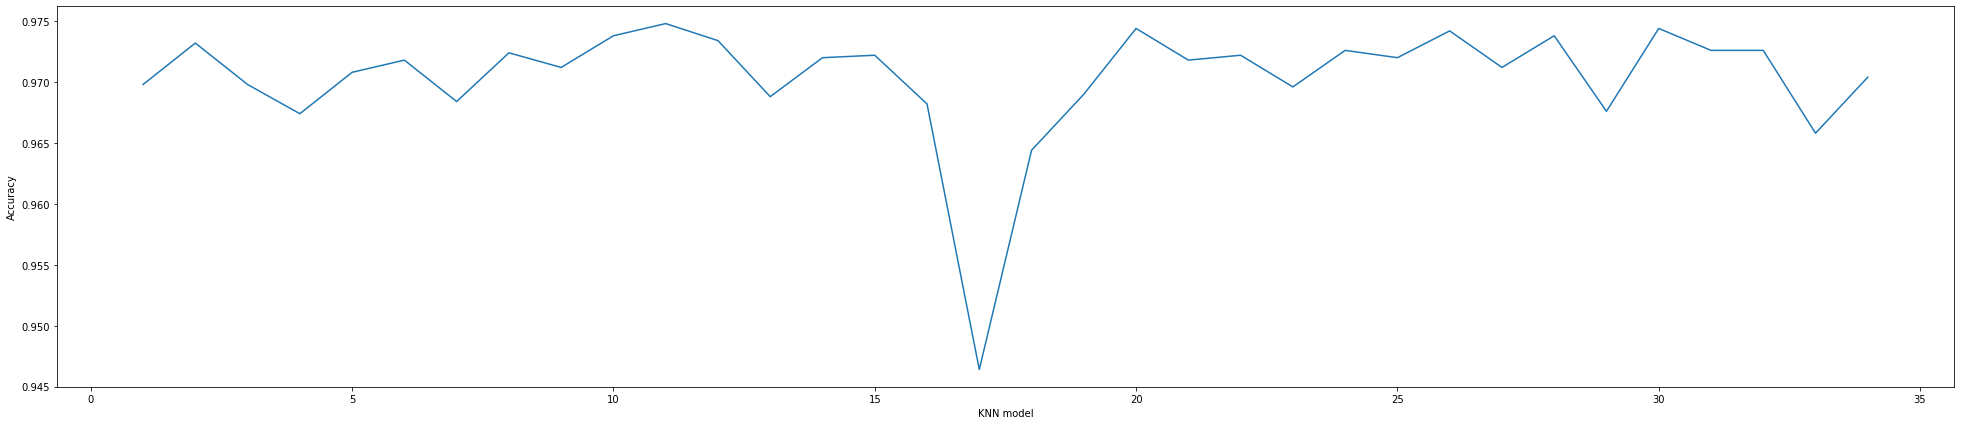

In [0]:
plt.figure(figsize=[dataset['Suggested Job Role'].nunique(), 7])
plt.plot(range(1, dataset['Suggested Job Role'].nunique()+1), knn_accuracy, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("KNN model")

#2. Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier

# List of decision tree classifiers for each Target label
dectree_classifiers = []
dectree_accuracy = []

for i in range(dataset['Suggested Job Role'].nunique()):
  #Training the classifier
  tree = DecisionTreeClassifier(random_state=0)
  tree.fit(X_train.values, np.array(y_train[:,i]).ravel())
  
  #Appending the classifier to the list
  dectree_classifiers.append(tree)
  print(f"Accuracy of Decision Tree {i+1}: {tree.score(X_test,y_test[:,i])}", end='\n\n')

  dectree_accuracy.append(tree.score(X_test,y_test[:,i]))

Accuracy of Decision Tree 1: 0.9306

Accuracy of Decision Tree 2: 0.9406

Accuracy of Decision Tree 3: 0.9316

Accuracy of Decision Tree 4: 0.9296

Accuracy of Decision Tree 5: 0.9334

Accuracy of Decision Tree 6: 0.9376

Accuracy of Decision Tree 7: 0.9348

Accuracy of Decision Tree 8: 0.9384

Accuracy of Decision Tree 9: 0.9346

Accuracy of Decision Tree 10: 0.9342

Accuracy of Decision Tree 11: 0.9344

Accuracy of Decision Tree 12: 0.9408

Accuracy of Decision Tree 13: 0.9364

Accuracy of Decision Tree 14: 0.9358

Accuracy of Decision Tree 15: 0.94

Accuracy of Decision Tree 16: 0.9288

Accuracy of Decision Tree 17: 0.8876

Accuracy of Decision Tree 18: 0.9268

Accuracy of Decision Tree 19: 0.9364

Accuracy of Decision Tree 20: 0.9392

Accuracy of Decision Tree 21: 0.9356

Accuracy of Decision Tree 22: 0.9374

Accuracy of Decision Tree 23: 0.9318

Accuracy of Decision Tree 24: 0.9384

Accuracy of Decision Tree 25: 0.933

Accuracy of Decision Tree 26: 0.9426

Accuracy of Decision Tre

Accuracy graph for Decision Tree models

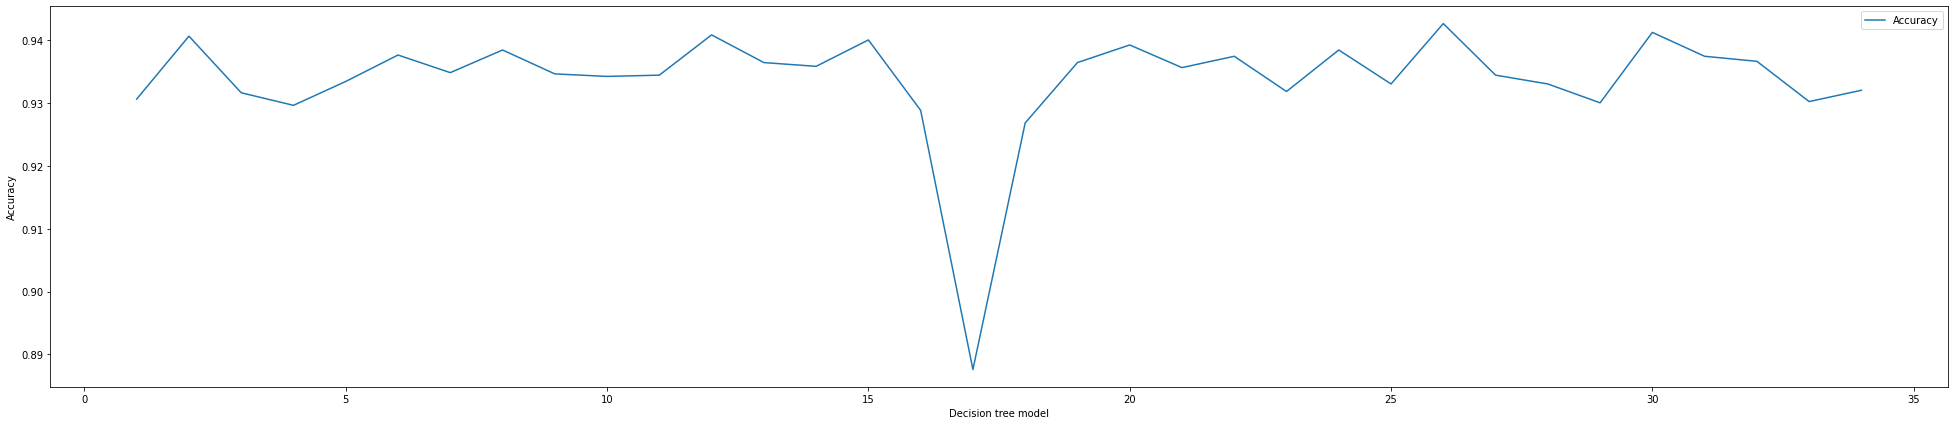

In [0]:
plt.figure(figsize=[dataset['Suggested Job Role'].nunique(), 7])
plt.plot(range(1, dataset['Suggested Job Role'].nunique()+1), dectree_accuracy, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Decision tree model")
plt.legend()

# K-Means Clustering 

PCA to reduce dimensionality to 2

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data = pca.fit_transform(dataset.iloc[:, :9])

Perform Clustering

In [0]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=500, random_state=0
)

y_predict = km.fit_predict(data)

Plotting the clusters and their centroids

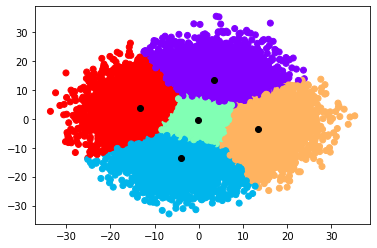

In [0]:
plt.scatter(data[:, 0], data[:, 1], c=km.labels_, cmap='rainbow')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black')